In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import json

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

In [4]:
df = pd.read_csv(r'D:\bp_sales_dataset_soco1.csv')

In [5]:
#change customer names to all uppercase
df['Customer'] = df['Customer'].str.upper()

In [6]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [7]:
df.head()

,id,date,description,qty,retail,subtotal,discount,tax,total,customer
0,137,10/7/2020,VELOX RIM TAPE 16MM #51,1,4.99,4.99,0.00,9%,5.44,NaN
1,140,10/8/2020,VELOX RIM TAPE 16MM #51,-1,4.99,-4.99,0.00,9%,-5.44,NaN
2,657,10/14/2020,TUBE - SCHRADER 24 X 1.5 REG,2,8.99,17.98,0.00,9%,19.60,NaN
3,676,10/14/2020,21 ALL CONDITION ARM 700 X 32,1,44.99,44.99,0.00,9%,49.04,NaN
4,723,10/14/2020,CHECKERBOARD MIRROR CHROME,1,14.99,14.99,0.00,9%,16.34,NaN


In [8]:
df = df.drop(['subtotal','tax'], axis=1)


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.head()

,id,date,description,qty,retail,discount,total,customer
26,739,2020-10-14,"(Work order #178, Item: MARIN MTB \nBASIC TUN...",1,0.00,0.00,0.00,ANDY LINDSAY
27,739,2020-10-14,BASIC TUNE-UP,1,100.00,0.00,100.00,ANDY LINDSAY
28,739,2020-10-14,INSTALL NEW TIRE AND/OR TUBE,1,15.00,0.00,15.00,ANDY LINDSAY
29,739,2020-10-14,INSTALL NEW TIRE AND/OR TUBE,1,15.00,0.00,15.00,ANDY LINDSAY
30,739,2020-10-14,21 HARDROCKER TIRE 29 X 2.0 BL,2,24.99,0.00,54.48,ANDY LINDSAY


In [12]:
df2=df.dropna()

In [13]:
df=df2

In [15]:
from datetime import date

In [16]:
today = date. today()

In [17]:
max_date = df['date'].min()
print(max_date)

2020-10-14 00:00:00


In [18]:
#change date data to datetime
today=pd.to_datetime(today)
max_date=pd.to_datetime(max_date)

In [19]:
agg_dict1 = {
    'id': 'count',
    'date': 'max',
    'retail': 'sum'
}

In [20]:
df_rfm = df.groupby('customer').agg(agg_dict1).reset_index()

In [21]:
df_rfm.columns = ['customer', 'frequency', 'max_date', 'monetary']

In [22]:
df_rfm['recency'] = (today - df_rfm['max_date']).dt.days

In [23]:
df_rfm.drop(['max_date'], axis=1, inplace=True)

In [24]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

In [25]:
df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)

In [26]:
df_rfm['f_score'] = pd.qcut((df_rfm.rank(method='first'))['frequency'], q=5, labels=f_labels).astype(int)


In [27]:
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)


In [28]:
df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

In [29]:
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [30]:
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\3311551769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[col])


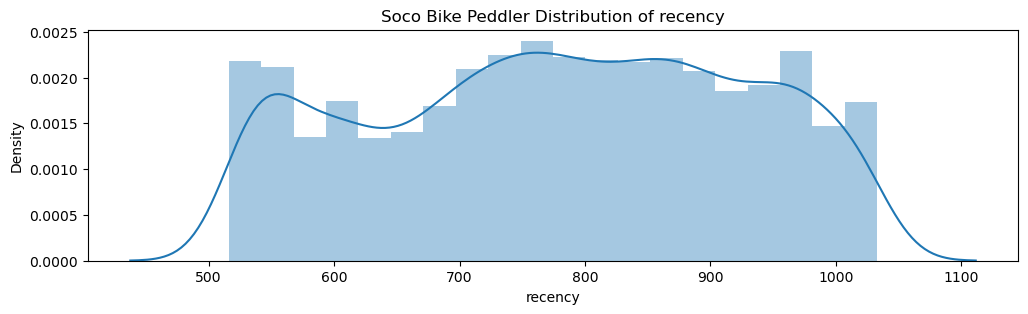

C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\3311551769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[col])


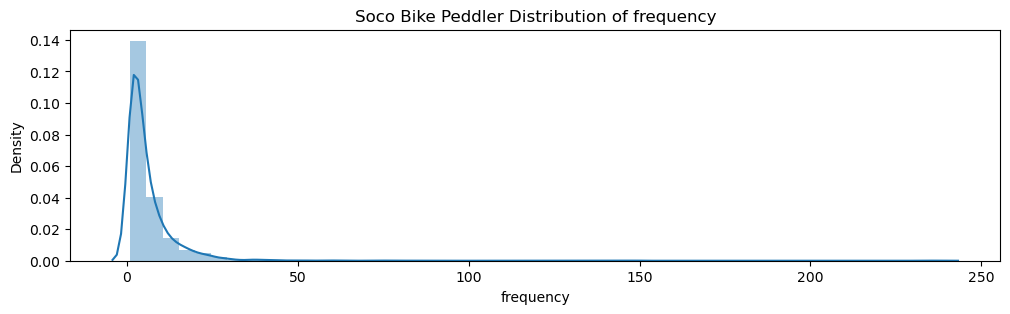

C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\3311551769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[col])


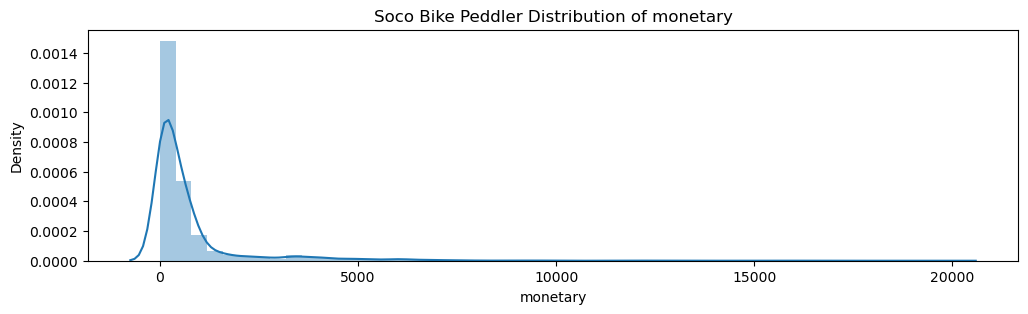

In [31]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Soco Bike Peddler Distribution of %s' % col)
    plt.show()

C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\2712733310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\2712733310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[df_rfm['r

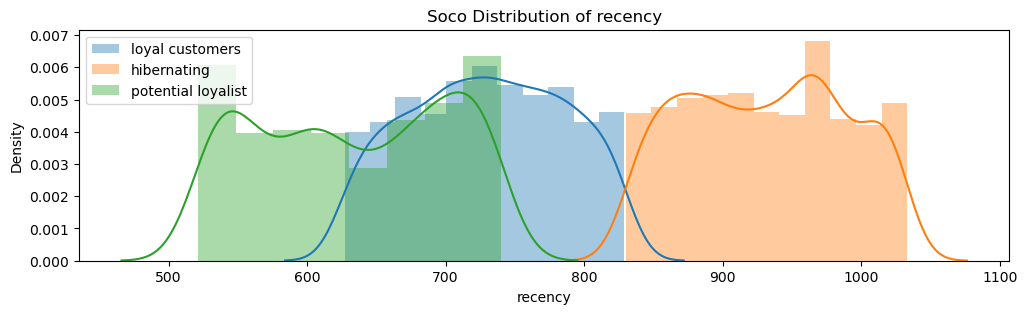

C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\2712733310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\2712733310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[df_rfm['r

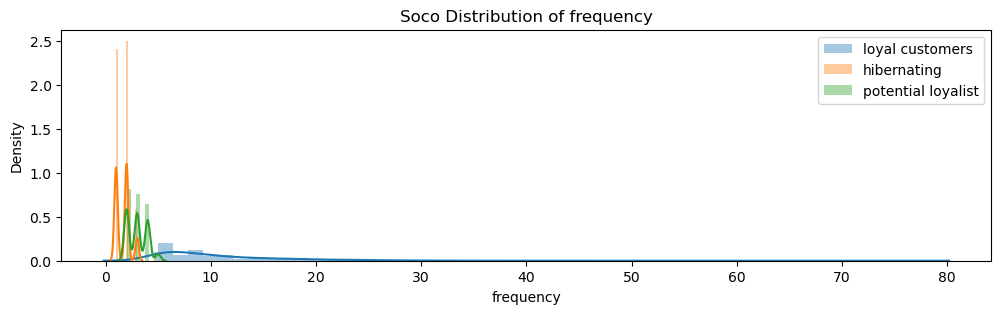

C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\2712733310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
C:\Users\Mat\AppData\Local\Temp\ipykernel_39272\2712733310.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm[df_rfm['r

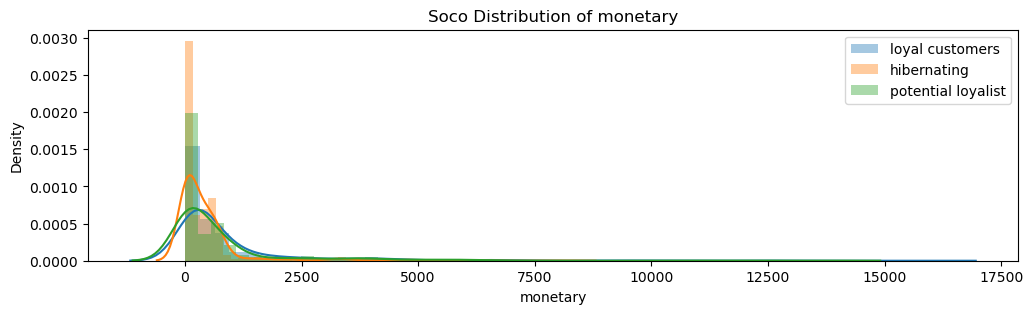

In [32]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
    ax.set_title('Soco Distribution of %s' % col)
    plt.legend()
    plt.show()

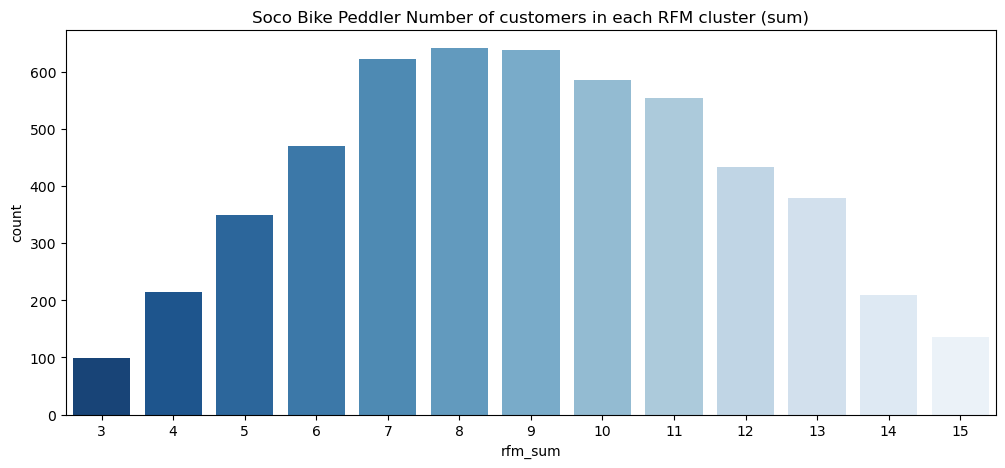

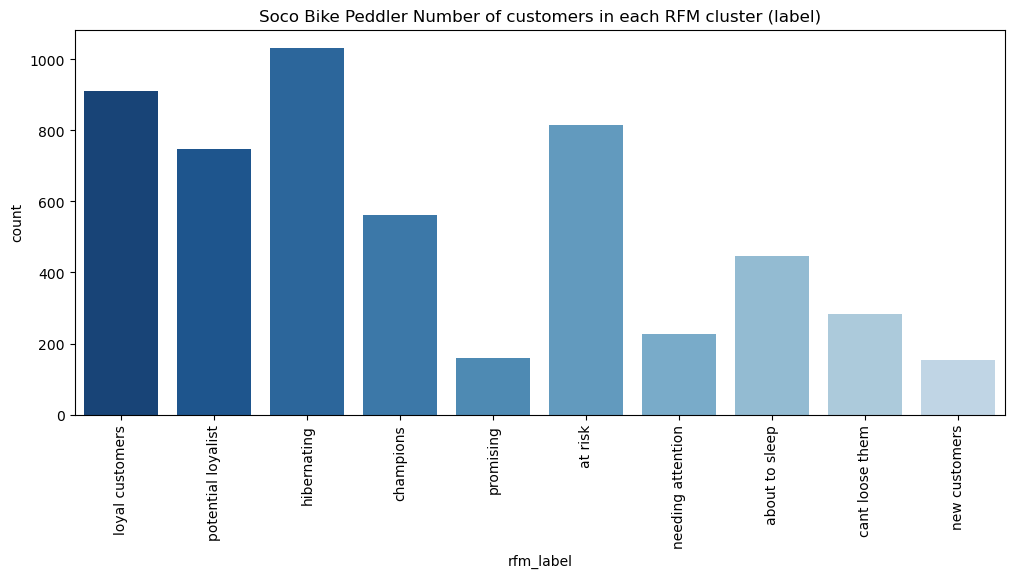

In [33]:
palette = sns.color_palette("Blues_r", n_colors=13)

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=df_rfm, palette=palette)
    ax.set_title('Soco Bike Peddler Number of customers in each RFM cluster (%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()

In [34]:
agg_dict2 = {
    'customer': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df_rfm.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'customer': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

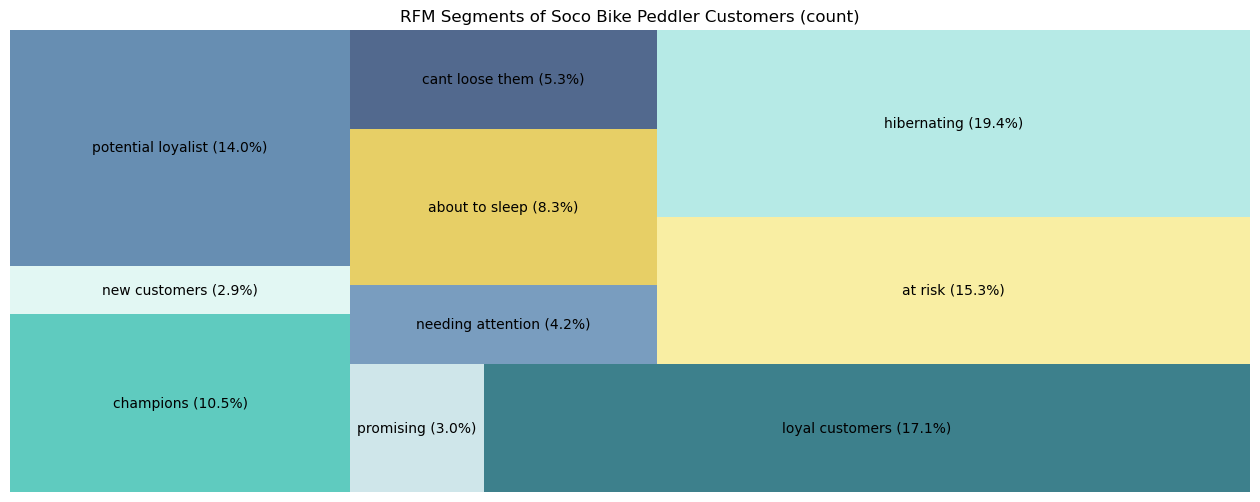

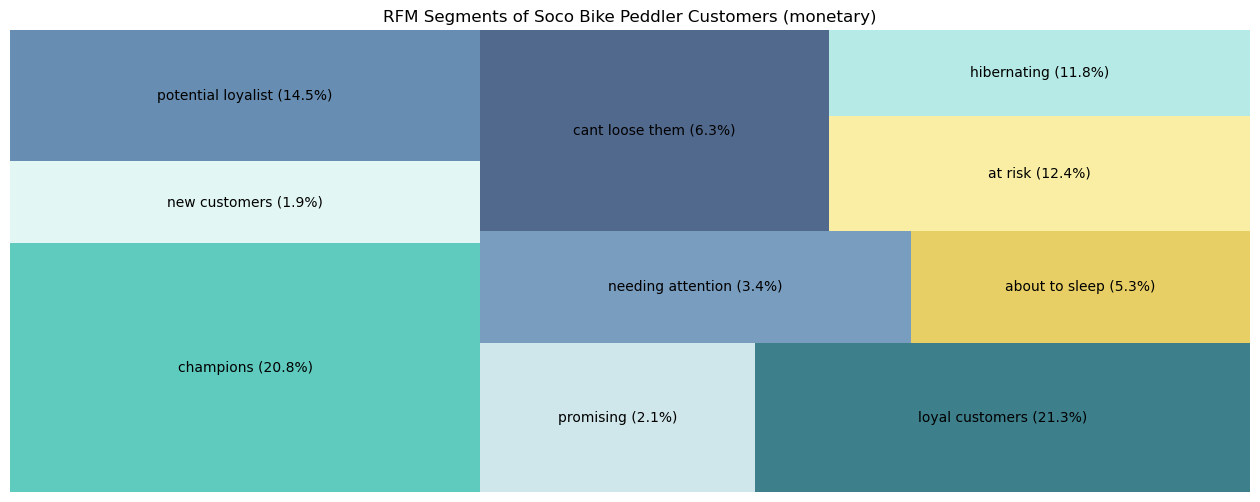

In [35]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Soco Bike Peddler Customers (%s)' % col)
    plt.axis('off')
    plt.show()

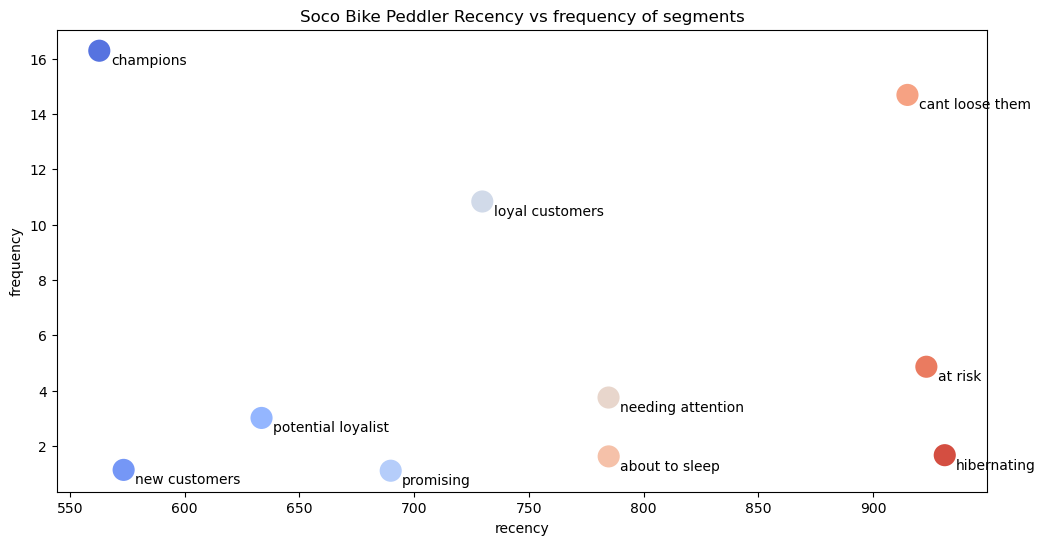

In [36]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Soco Bike Peddler Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

In [37]:
display(df_rfm)

,customer,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,,21,242.86,680,4,5,3,12,loyal customers
1,AARON ARROYO,3,180.00,690,4,2,3,9,potential loyalist
2,AARON BECKSTEAD,1,"3,299.99",945,1,1,5,7,hibernating
3,AARON BEHRENS,1,19.99,950,1,1,1,3,hibernating
4,AARON BLACKLEDGE,18,284.05,534,5,5,3,13,champions
...,...,...,...,...,...,...,...,...,...
5327,ZANE BARZAGHI,2,664.99,772,3,2,4,9,about to sleep
5328,ZANE SAXTON,2,624.98,882,2,2,4,8,hibernating
5329,ZEB SNYDER,2,100.00,528,5,2,2,9,potential loyalist
5330,ZOE HIRSCH,3,106.99,725,4,3,2,9,potential loyalist


In [38]:
df.head()

,id,date,description,qty,retail,discount,total,customer
26,739,2020-10-14,"(Work order #178, Item: MARIN MTB \nBASIC TUN...",1,0.00,0.00,0.00,ANDY LINDSAY
27,739,2020-10-14,BASIC TUNE-UP,1,100.00,0.00,100.00,ANDY LINDSAY
28,739,2020-10-14,INSTALL NEW TIRE AND/OR TUBE,1,15.00,0.00,15.00,ANDY LINDSAY
29,739,2020-10-14,INSTALL NEW TIRE AND/OR TUBE,1,15.00,0.00,15.00,ANDY LINDSAY
30,739,2020-10-14,21 HARDROCKER TIRE 29 X 2.0 BL,2,24.99,0.00,54.48,ANDY LINDSAY


In [39]:
df_rfm.to_excel(r'D:\soco_bp_sales_rfmdataset.xlsx', index=False)

In [40]:
#merge rfm to whole dataset
df_merge = df.merge(df_rfm, left_on='customer', right_on='customer')

In [41]:
df_merge.head()

,id,date,description,qty,retail,discount,total,customer,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,739,2020-10-14,"(Work order #178, Item: MARIN MTB \nBASIC TUN...",1,0.00,0.00,0.00,ANDY LINDSAY,12,486.95,1033,1,5,4,10,cant loose them
1,739,2020-10-14,BASIC TUNE-UP,1,100.00,0.00,100.00,ANDY LINDSAY,12,486.95,1033,1,5,4,10,cant loose them
2,739,2020-10-14,INSTALL NEW TIRE AND/OR TUBE,1,15.00,0.00,15.00,ANDY LINDSAY,12,486.95,1033,1,5,4,10,cant loose them
3,739,2020-10-14,INSTALL NEW TIRE AND/OR TUBE,1,15.00,0.00,15.00,ANDY LINDSAY,12,486.95,1033,1,5,4,10,cant loose them
4,739,2020-10-14,21 HARDROCKER TIRE 29 X 2.0 BL,2,24.99,0.00,54.48,ANDY LINDSAY,12,486.95,1033,1,5,4,10,cant loose them


In [42]:
df_merge.to_excel(r'D:\soco_bp_sales_rfmdataset_merge.xlsx', index=False)